# In this notebook we will find cell-cell interaction changed genes

---
First we need to import our spatial pre-processing notebook and run binSpect below:

In [9]:
source("scripts//spatial_pre_process.R")

# identify genes with a spatial coherent expression profile
km_spatialgenes = binSpect(my_giotto_object, bin_method = 'kmeans')


✔  checking for file ‘/private/var/folders/m3/t_3pkq6n4xlchjj8wcb_y18r0000gn/T/RtmpM0L9lz/remotesd2e4276efbc2/RubD-Giotto-1b60529/DESCRIPTION’
─  preparing ‘Giotto’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts (414ms)
─  checking for empty or unneeded directories
   Removed empty directory ‘Giotto/src’
─  building ‘Giotto_1.0.3.tar.gz’
   

 giotto environment found at 
 /Users/natalie_dr/Library/r-miniconda/envs/giotto_env/bin/pythonw 
Giotto environment is already installed, set force_environment = TRUE to reinstall 
Consider to install these (optional) packages to run all possible Giotto commands:  tiff biomaRt trendsceek multinet RTriangle FactoMiner
 Giotto does not automatically install all these packages as they are not absolutely required and this reduces the number of dependencies
 no external python path was provided, but a giotto python environment was found and will be used 

 first sca

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”



 This is the single parameter version of binSpect
 1. matrix binarization complete 

 2. spatial enrichment test completed 

 3. (optional) average expression of high expressing cells calculated 

 4. (optional) number of high expressing cells calculated 


### 1. Interaction changed genes

Below, we'll find our [interaction changed genes](https://rubd.github.io/Giotto_site/reference/findICG.html) (ICGs):

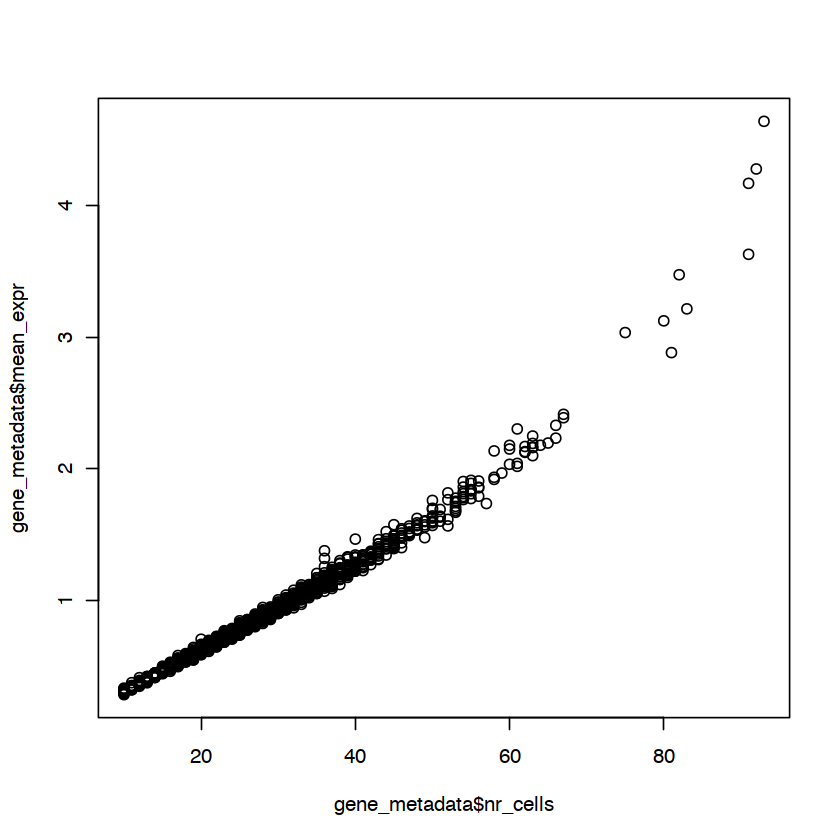

0%      25%      50%      75%     100% 
3.405724 3.637761 3.708859 3.793603 5.882847

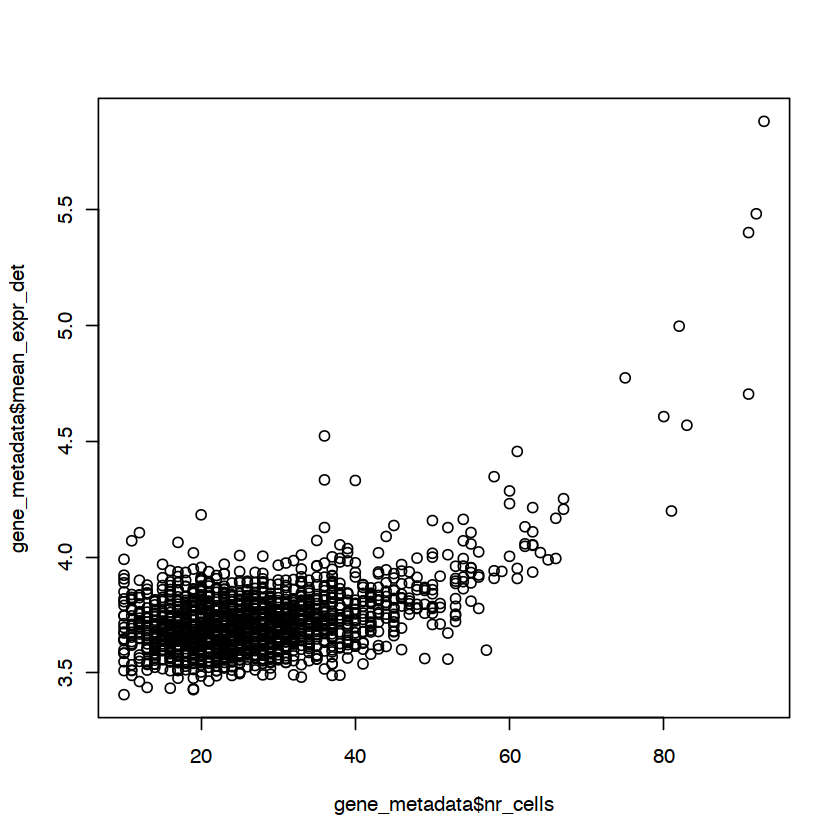

In [10]:
## select top 25th highest expressing genes
gene_metadata = fDataDT(my_giotto_object)
plot(gene_metadata$nr_cells, gene_metadata$mean_expr)
plot(gene_metadata$nr_cells, gene_metadata$mean_expr_det)

quantile(gene_metadata$mean_expr_det)
high_expressed_genes = gene_metadata[mean_expr_det > 4]$gene_ID

## identify genes that are associated with proximity to other cell types
ICGscoresHighGenes =  findICG(gobject = my_giotto_object,
                              selected_genes = high_expressed_genes,
                              spatial_network_name = 'Delaunay_network',
                              cluster_column = 'cell_types',
                              diff_test = 'permutation',
                              adjust_method = 'fdr',
                              nr_permutations = 500,
                              do_parallel = T, cores = 2)

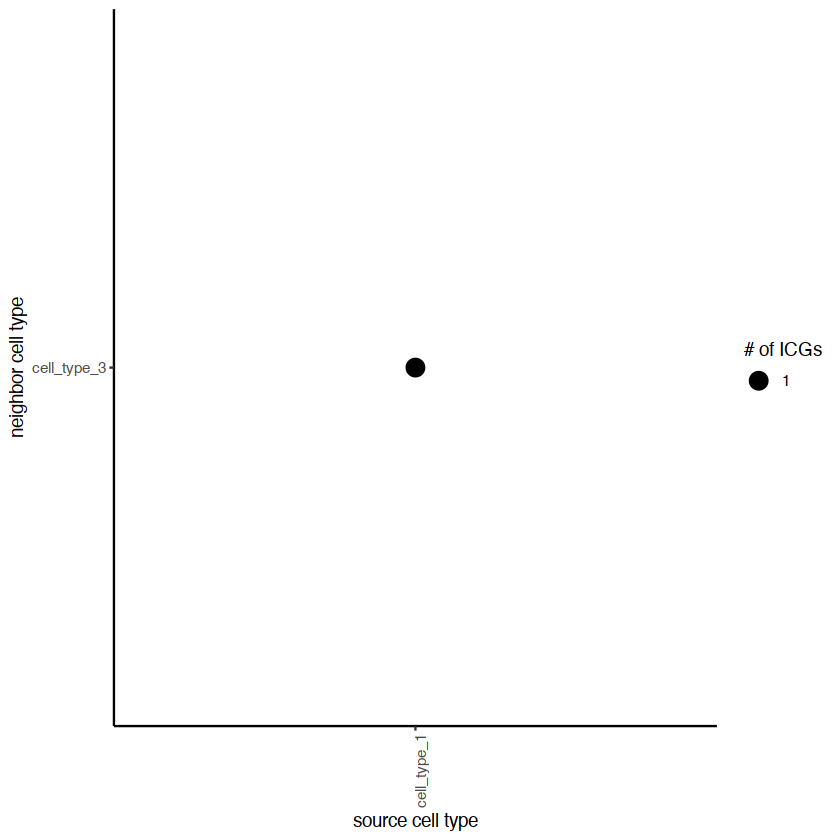

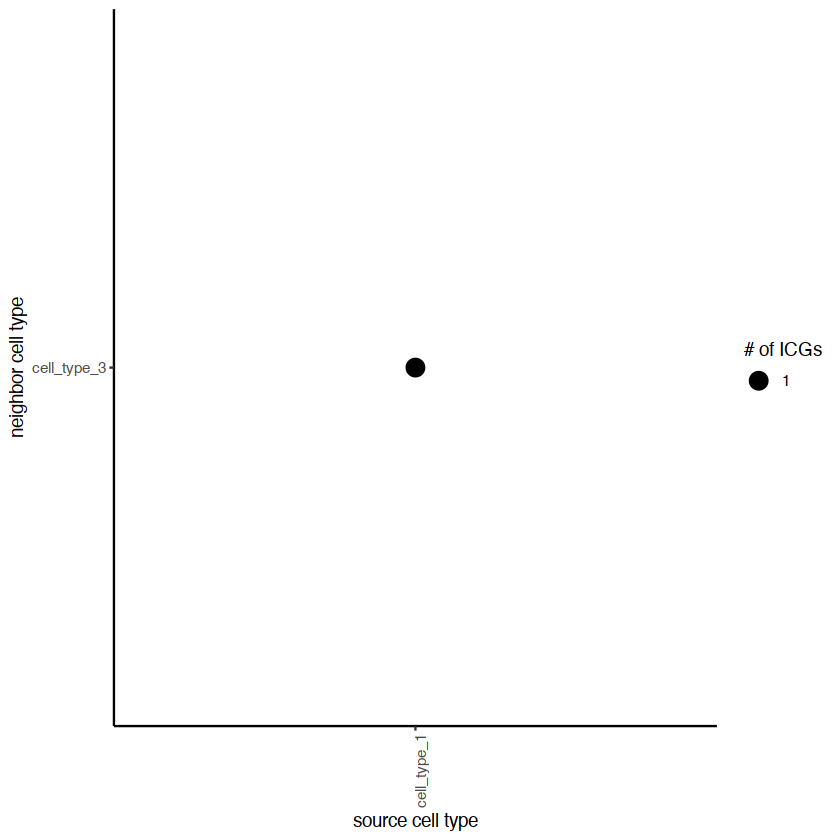

In [15]:
## visualize all genes
plotCellProximityGenes(my_giotto_object, 
                       cpgObject = ICGscoresHighGenes, 
                       method = 'dotplot')

### 2. Filter ICGs:

Below we'll [filter our ICGs](https://rubd.github.io/Giotto_site/reference/filterICG.html):

In [12]:
# filter genes
ICGscoresFilt = filterICG(ICGscoresHighGenes, 
                          min_cells = 2, min_int_cells = 2, min_fdr = 0.1,
                          min_spat_diff = 0.1, min_log2_fc = 0.1, min_zscore = 1)

### 3. Visualize
Now we can visualize our selected ICGs:


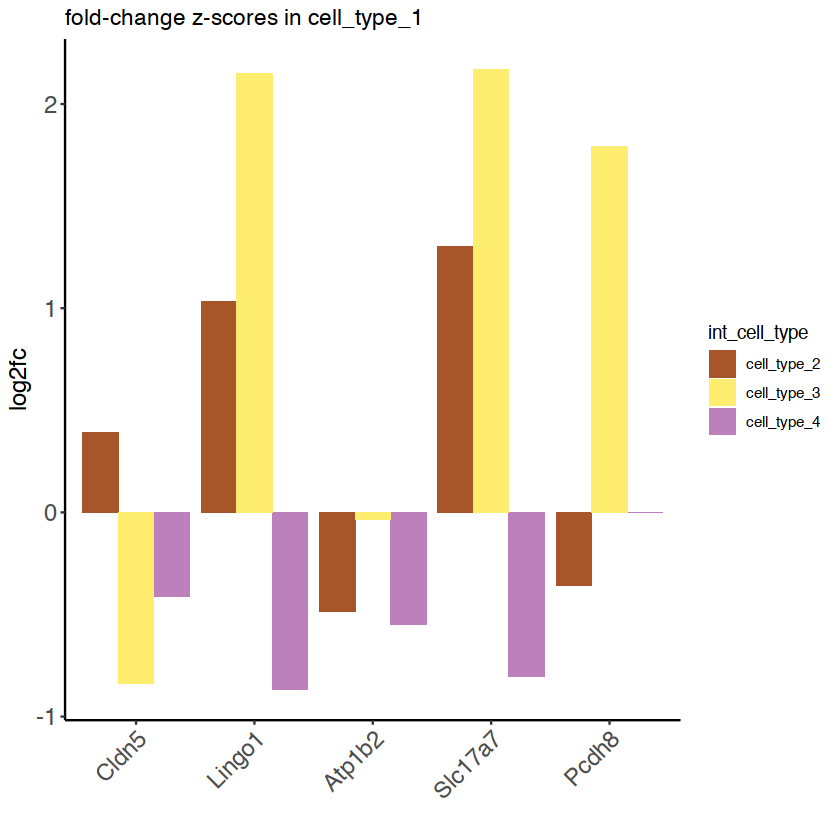

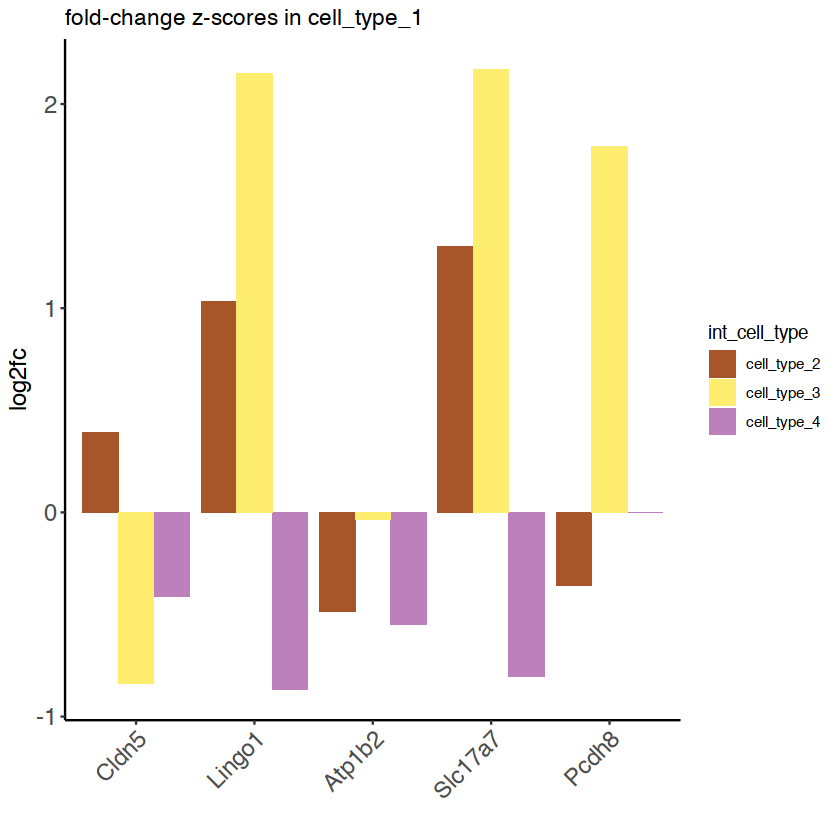

In [13]:
## visualize subset of interaction changed genes (ICGs)
# random subset
ICG_genes = c("Atp1b2", "Slc17a7", "Pcdh8")
ICG_genes_types = c("cell_type_2", "cell_type_3", "cell_type_4")
names(ICG_genes) = ICG_genes_types

plotICG(gobject = my_giotto_object,
        cpgObject = ICGscoresHighGenes,
        source_type = "cell_type_1",
        source_markers = c("Cldn5", "Lingo1"),
        ICG_genes = ICG_genes)